# Data Analysis

Started off with the products column to get a gist of what kind of products were being sold earlier by the applicants. Clearly there was no dominance.

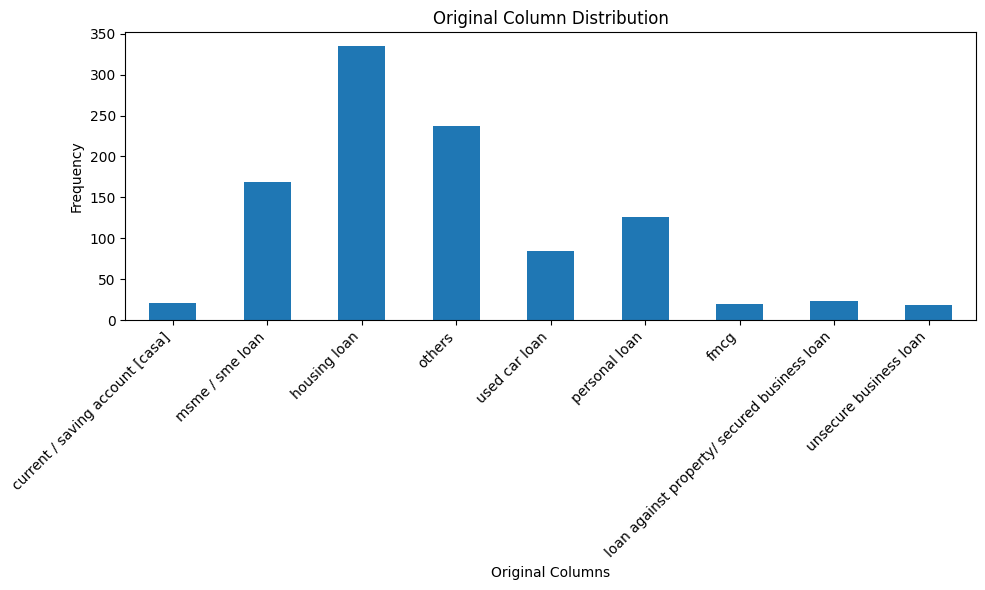

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('/kaggle/input/primal2-0/final_train.csv')
df_test = pd.read_csv('/kaggle/input/primal2-0/final_train.csv')

product_columns = ['current / saving account [casa]',
       'msme / sme loan',
       'housing loan', 'others', 'used car loan', 'personal loan', 'fmcg',
       'loan against property/ secured business loan',
        'unsecure business loan']

original_column_distribution = df_train[product_columns].sum()
plt.figure(figsize=(10, 6))
original_column_distribution.plot(kind='bar')
plt.title('Original Column Distribution')
plt.xlabel('Original Columns')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Next I use date of joining as a parameter to judge the performance of a person. Failed to draw much corelation though :(

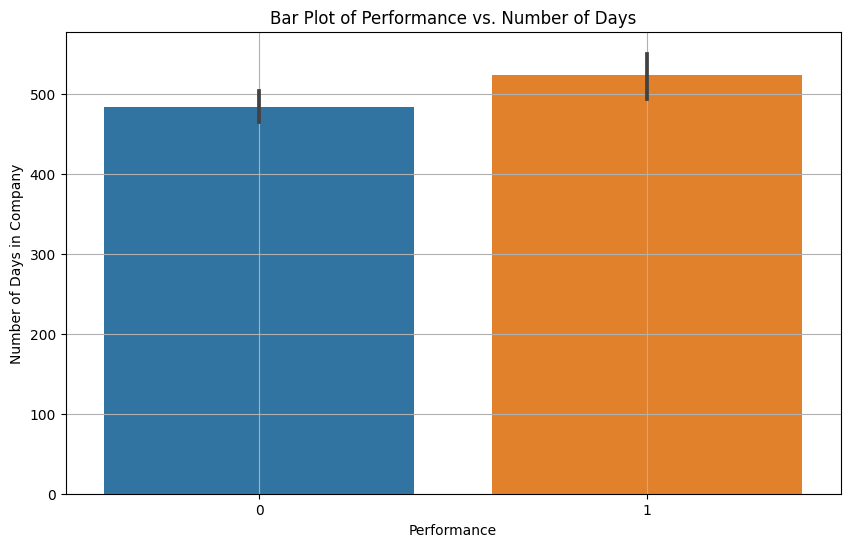

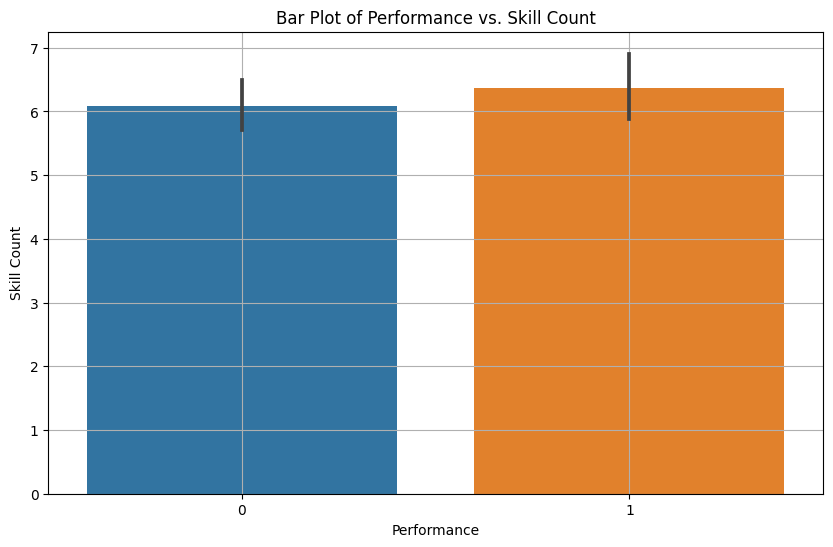

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of 'Performance' vs. 'Days_passed'
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Performance', y='Days_passed')
plt.title('Bar Plot of Performance vs. Number of Days')
plt.xlabel('Performance')
plt.ylabel('Number of Days in Company')
plt.grid(True)
plt.show()

# Bar plot of 'Performance' vs. 'Skill Count'
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Performance', y='Skill_count')
plt.title('Bar Plot of Performance vs. Skill Count')
plt.xlabel('Performance')
plt.ylabel('Skill Count')
plt.grid(True)
plt.show()


Are ticket size sold in previous job or family members a good predictor to this?

In [31]:
df_train.columns

Index(['Unnamed: 0', 'CandidateID', 'Designation', 'Graduation',
       'Qualification', 'Experience', 'Industry', 'Previous_Organizations',
       'Incentive', 'Source', 'Ticket_Size', 'Family_Members',
       'Earning_Members', 'Dependent_Members', 'Department', 'DOJ', 'Location',
       'R_Pincode', 'B_Pincode', 'Performance',
       'current / saving account [casa]',
       'current account â saving account/others', 'msme / sme loan',
       'housing loan', 'others', 'used car loan', 'personal loan', 'fmcg',
       'loan against property/ secured business loan',
       'car loan / used car loan', 'unsecure business loan', 'Days_passed',
       'R_District', 'R_Region', 'R_State', 'B_District', 'B_Region',
       'B_State', 'Distance_Kilometers', 'R_Population', 'R_Density',
       'B_Population', 'B_Density', 'Company_1', 'Company_2', 'assamese',
       'bengali', 'gujarati', 'hindi', 'kannada', 'kashmiri', 'konkani',
       'malayalam', 'manipuri', 'marathi', 'nepali', 'oriya', 

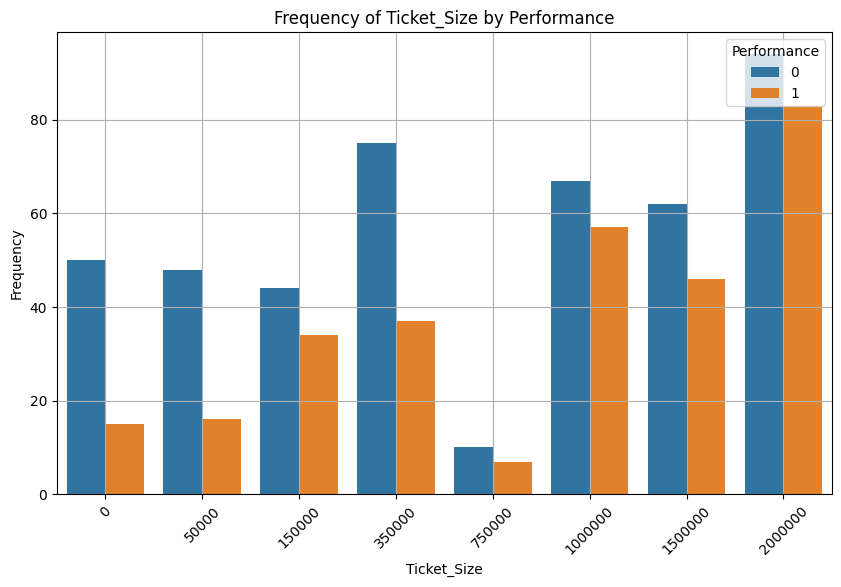

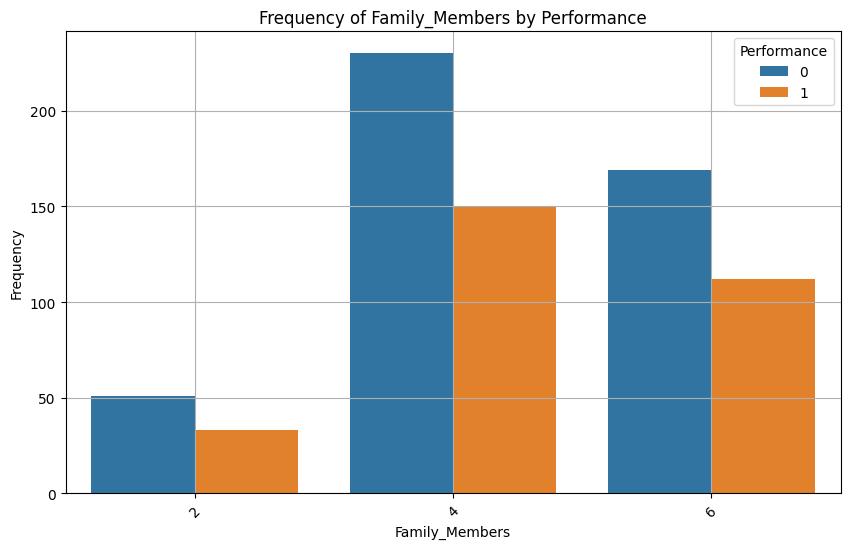

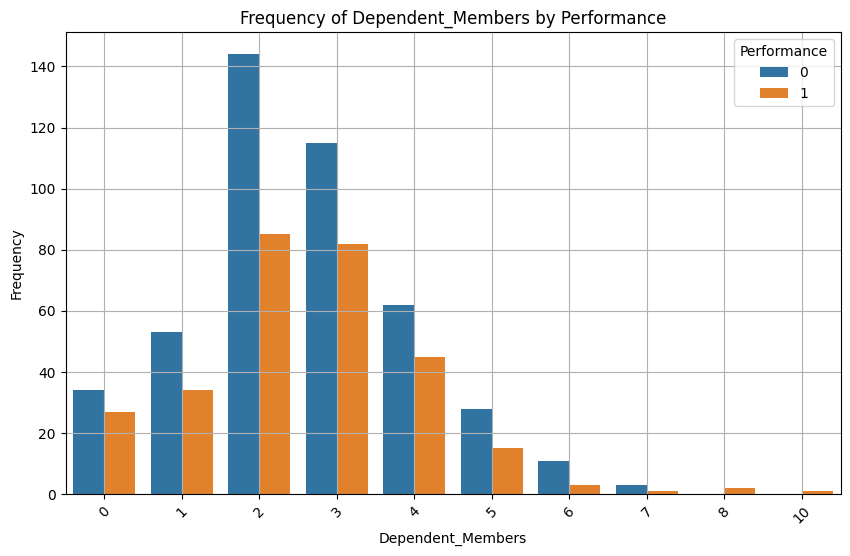

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'Performance' and one-hot encoded variables

# List of one-hot encoded variables
one_hot_variables = ['Ticket_Size', 'Family_Members', 'Dependent_Members']  # List of your one-hot encoded variables

# Plotting
for variable in one_hot_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=variable, hue='Performance')
    plt.title(f'Frequency of {variable} by Performance')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.legend(title='Performance', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(True)
    plt.show()


We can't conclude much from this data since there is not much difference in any case and for any value of dependent members, number of bad performers is larger than good. 
May be this is because we have fewer good people left.
Nonetheless these are mostly gaussian distribution.

For states, majority of the applications come from the state of tamil nadu. I guess this was the reason tamil was the third most common language in the dataset

In [33]:
df_state = df_train['R_State'].value_counts()
df_state = pd.DataFrame({'Frequency': df_train['R_State'].value_counts()})

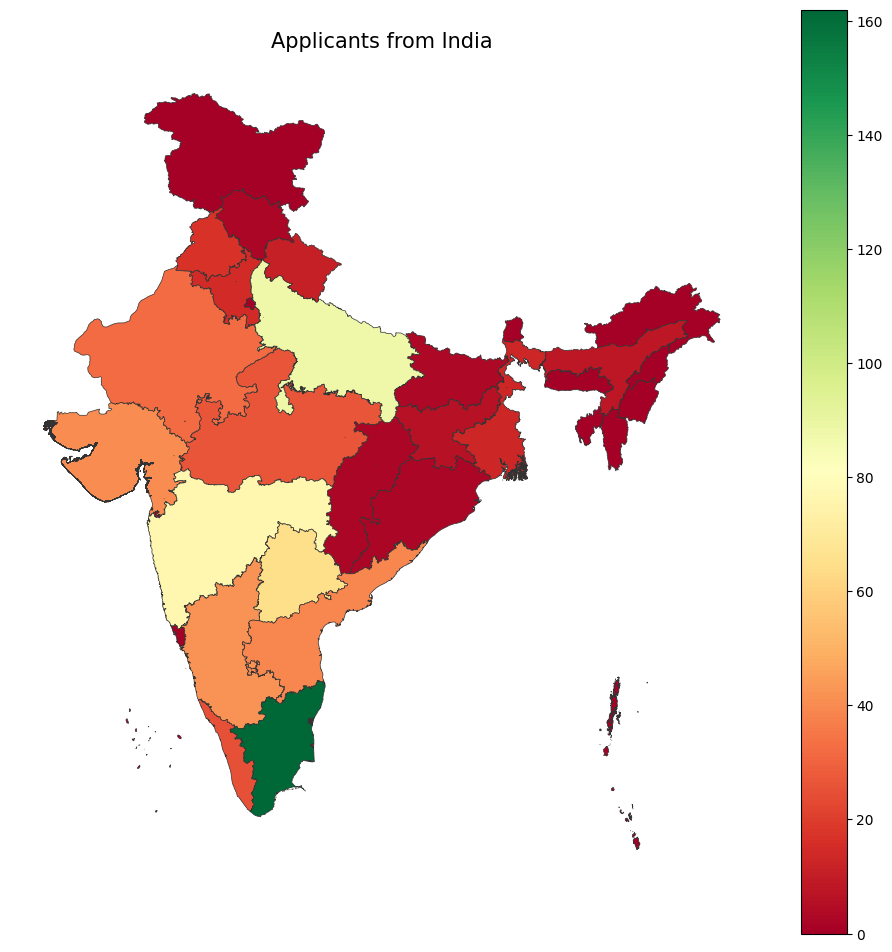

In [59]:
df_train

import geopandas as gpd
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf['st_nm'] = shp_gdf['st_nm'].str.lower()
shp_gdf['st_nm'] = shp_gdf['st_nm'].str.replace(' & ', ' ')
merged = shp_gdf.set_index('st_nm').join(df_state, how = 'left')
merged = merged.fillna(0)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Applicants from India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Frequency', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

Finally let's check the coorelation of various parameters with respect to one another.

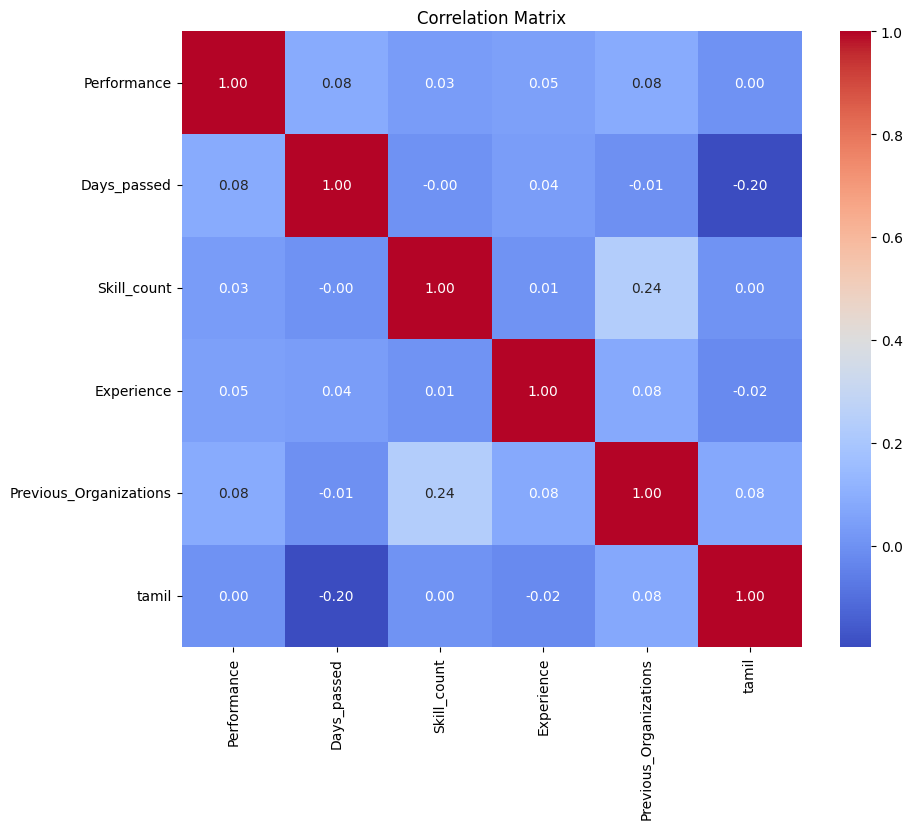

In [71]:
# Selecting a few columns for correlation analysis
selected_columns = ['Performance', 'Days_passed', 'Skill_count', 'Experience', 'Previous_Organizations','tamil']

# Calculating the correlation matrix
correlation_matrix = df_train[selected_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()